# Processing data for modelling

In [11]:
import pandas as pd
from tqdm import tqdm

from functions import print_shape, df_security_code

from feature_engineering import (fill_and_drop_na_values,
 adjust_price, 
 price_new_features, 
 encode_flag,
 fill_finances_knn,
 new_features_financial

 )
from functions import missingValues

MISSINGVALUES = True
DATASELECTION = False

## import data

In [2]:
def data_selection(selection):
    if selection:
        prices = df_security_code(pd.read_csv('data/train_files/stock_prices.csv', parse_dates=[1]))
        financial = df_security_code(pd.read_csv('data/train_files/financials.csv',parse_dates=['Date']))
    else: 
        prices = pd.read_csv('data/train_files/stock_prices.csv', parse_dates=[1])
        financial = pd.read_csv('data/train_files/financials.csv',parse_dates=['Date'])
    return prices, financial

In [3]:
# helper function
def save_and_load(df):
    df_name = name =[x for x in globals() if globals()[x] is df][0]
    name = 'data/curr_' + df_name + '.csv'
    df.to_csv(name)
    del df
    return pd.read_csv(name, parse_dates=['Date'], index_col=[0] )

In [4]:
prices, financial = data_selection(DATASELECTION)

In [5]:
prices.head(2)

,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,20170104_1332,2017-01-04,1332,568.0,576.0,563.0,571.0,2798500,1.0,NaN,False,0.012324


In [6]:
financial.head(2)

,DisclosureNumber,DateCode,Date,SecuritiesCode,DisclosedDate,DisclosedTime,DisclosedUnixTime,TypeOfDocument,CurrentPeriodEndDate,TypeOfCurrentPeriod,...,ForecastEarningsPerShare,ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,MaterialChangesInSubsidiaries,ChangesBasedOnRevisionsOfAccountingStandard,ChangesOtherThanOnesBasedOnRevisionsOfAccountingStandard,ChangesInAccountingEstimates,RetrospectiveRestatement,NumberOfIssuedAndOutstandingSharesAtTheEndOfFiscalYearIncludingTreasuryStock,NumberOfTreasuryStockAtTheEndOfFiscalYear,AverageNumberOfShares
0,2.016121e+13,20170104_2753,2017-01-04,2753.0,2017-01-04,07:30:00,1.483483e+09,3QFinancialStatements_Consolidated_JP,2016-12-31,3Q,...,319.76,NaN,False,True,False,False,False,6848800.0,－,6848800.0
1,2.017010e+13,20170104_3353,2017-01-04,3353.0,2017-01-04,15:00:00,1.483510e+09,3QFinancialStatements_Consolidated_JP,2016-11-30,3Q,...,485.36,NaN,False,True,False,False,False,2035000.0,118917,1916083.0


## - Stock price

In [7]:
# test with feature_engineering.py
#prices = pd.read_csv('data/train_files/stock_prices.csv', parse_dates=[1])
print_shape(prices, MISSINGVALUES)
#prices.head(2)

 Shape:
 ----------------------------------------
 Observations:   2.33M
 Features:       12
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')
----------------------------------------


,N_missing,Percentage
ExpectedDividend,2313666.0,99.19
Open,7608.0,0.33
High,7608.0,0.33
Low,7608.0,0.33
Close,7608.0,0.33
Target,238.0,0.01
RowId,0.0,0.00
Date,0.0,0.00
SecuritiesCode,0.0,0.00
Volume,0.0,0.00


In [8]:

#from feature_engineering import fill_and_drop_na_values

# fill na
fill_prices = fill_and_drop_na_values(prices, drop=False)

# save and load

fill_prices = save_and_load(fill_prices)

fill_prices.to_csv('data/curr_fill_prices.csv')
print_shape(fill_prices, MISSINGVALUES)
fill_prices.head(2)



100%|██████████| 2000/2000 [06:41<00:00,  4.99it/s]


 Shape:
 ----------------------------------------
 Observations:   2.33M
 Features:       12
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'Open', 'High', 'Low', 'Close',
       'Volume', 'AdjustmentFactor', 'ExpectedDividend', 'SupervisionFlag',
       'Target'],
      dtype='object')
----------------------------------------


,N_missing,Percentage
Open,264.0,0.01
High,264.0,0.01
Low,264.0,0.01
Close,264.0,0.01
Target,238.0,0.01
RowId,0.0,0.00
Date,0.0,0.00
SecuritiesCode,0.0,0.00
Volume,0.0,0.00
AdjustmentFactor,0.0,0.00


,RowId,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,20170104_1301,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,0.0,False,0.00073
1865,20170105_1301,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,0.0,False,0.00292


In [9]:
#fill_prices = pd.read_csv('data/curr_fill_prices.csv', parse_dates=['Date'], index_col=[0])
#print_shape(fill_prices)

In [10]:



ad_price = adjust_price(fill_prices)
ad_price = save_and_load(ad_price)
print_shape(ad_price, MISSINGVALUES)
ad_price.head(2)
#del ad_price

100%|██████████| 2000/2000 [07:22<00:00,  4.52it/s]


 Shape:
 ----------------------------------------
 Observations:   2.33M
 Features:       12
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'AdjustmentFactor',
       'ExpectedDividend', 'SupervisionFlag', 'ad_Open', 'ad_High', 'ad_Low',
       'ad_Close', 'ad_Volume', 'ad_Target'],
      dtype='object')
----------------------------------------


,N_missing,Percentage
ad_Target,4238.0,0.18
ad_Open,264.0,0.01
ad_High,264.0,0.01
ad_Low,264.0,0.01
ad_Close,264.0,0.01
RowId,0.0,0.00
Date,0.0,0.00
SecuritiesCode,0.0,0.00
AdjustmentFactor,0.0,0.00
ExpectedDividend,0.0,0.00


,RowId,Date,SecuritiesCode,AdjustmentFactor,ExpectedDividend,SupervisionFlag,ad_Open,ad_High,ad_Low,ad_Close,ad_Volume,ad_Target
1483,20170104_8194,2017-01-04,8194,1.0,0.0,False,3325.0,3390.0,3300.0,3380.0,36100.0,-0.002963
3348,20170105_8194,2017-01-05,8194,1.0,0.0,False,3395.0,3420.0,3360.0,3375.0,19400.0,-0.020802


In [11]:
#ad_price = pd.read_csv('data/curr_ad_price.csv', parse_dates=['Date'], index_col=[0])
#print_shape(ad_price)

In [12]:
#from feature_engineering import price_new_features, encode_flag

ad_price_feat = price_new_features(ad_price)

ad_price_feat['SupervisionFlag'] = encode_flag(ad_price_feat)
#ad_price_feat.to_csv('data/curr_ad_price_feat.csv')

ad_price_feat = save_and_load(ad_price_feat)

print_shape(ad_price_feat, MISSINGVALUES)


100%|██████████| 2000/2000 [2:50:17<00:00,  5.11s/it]    


 Shape:
 ----------------------------------------
 Observations:   2.33M
 Features:       53
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'AdjustmentFactor',
       'ExpectedDividend', 'SupervisionFlag', 'ad_Open', 'ad_High', 'ad_Low',
       'ad_Close', 'ad_Volume', 'ad_Target', 'ad_Close_lag1', 'ad_Close_sma10',
       'logprice_ad_Close', 'trend_ad_Close', 'detrend_ad_Close',
       'season_ad_Close', 'error_ad_Close', 'ad_Open_lag1', 'ad_Open_sma10',
       'logprice_ad_Open', 'trend_ad_Open', 'detrend_ad_Open',
       'season_ad_Open', 'error_ad_Open', 'ad_High_lag1', 'ad_High_sma10',
       'logprice_ad_High', 'trend_ad_High', 'detrend_ad_High',
       'season_ad_High', 'error_ad_High', 'ad_Low_lag1', 'ad_Low_sma10',
       'logprice_ad_Low', 'trend_ad_Low', 'detrend_ad_Low', 'season_ad_Low',
       'error_ad_Low', 'ad_Volume_lag1', 'ad_Volume_sma10', 'RSI', 'Return',
       'Log_Return', 'macd', 'macd_h', 'ma

,N_missing,Percentage
trend_ad_Close,58264.0,2.50
detrend_ad_High,58264.0,2.50
season_ad_High,58264.0,2.50
error_ad_High,58264.0,2.50
error_ad_Open,58264.0,2.50
season_ad_Open,58264.0,2.50
detrend_ad_Open,58264.0,2.50
trend_ad_Open,58264.0,2.50
error_ad_Close,58264.0,2.50
season_ad_Close,58264.0,2.50


In [13]:
dateL = ['Date', 'Year',
       'week', 'Day', 'Month' ]

In [14]:
ad_price_feat[dateL]

,Date,Year,week,Day,Month
1483,2017-01-04,2017.0,1.0,4.0,1.0
3348,2017-01-05,2017.0,1.0,5.0,1.0
5213,2017-01-06,2017.0,1.0,6.0,1.0
7078,2017-01-10,2017.0,2.0,10.0,1.0
8943,2017-01-11,2017.0,2.0,11.0,1.0
...,...,...,...,...,...
2324136,2021-11-29,2021.0,48.0,29.0,11.0
2326136,2021-11-30,2021.0,48.0,30.0,11.0
2328136,2021-12-01,2021.0,48.0,1.0,12.0
2330136,2021-12-02,2021.0,48.0,2.0,12.0


In [15]:
#ad_price_feat =  pd.read_csv('data/curr_ad_price_feat.csv', parse_dates=['Date'], index_col=[0])
#print_shape(ad_price_feat)

## - Financials

In [16]:
#from feature_engineering import fill_finances

#financial = financial = pd.read_csv('data/train_files/financials.csv',parse_dates=['Date'])
#financial.head(2)

In [17]:
print_shape(financial)

 Shape:
 ----------------------------------------
 Observations:   93K
 Features:       45
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['DisclosureNumber', 'DateCode', 'Date', 'SecuritiesCode',
       'DisclosedDate', 'DisclosedTime', 'DisclosedUnixTime', 'TypeOfDocument',
       'CurrentPeriodEndDate', 'TypeOfCurrentPeriod',
       'CurrentFiscalYearStartDate', 'CurrentFiscalYearEndDate', 'NetSales',
       'OperatingProfit', 'OrdinaryProfit', 'Profit', 'EarningsPerShare',
       'TotalAssets', 'Equity', 'EquityToAssetRatio', 'BookValuePerShare',
       'ResultDividendPerShare1stQuarter', 'ResultDividendPerShare2ndQuarter',
       'ResultDividendPerShare3rdQuarter',
       'ResultDividendPerShareFiscalYearEnd', 'ResultDividendPerShareAnnual',
       'ForecastDividendPerShare1stQuarter',
       'ForecastDividendPerShare2ndQuarter',
       'ForecastDividendPerShare3rdQuarter',
       'ForecastDividendPerShareFiscalYearEnd',
       'ForecastDividendPer

,N_missing,Percentage
ApplyingOfSpecificAccountingOfTheQuarterlyFinancialStatements,85707.0,92.20
ForecastDividendPerShare1stQuarter,73715.0,79.30
ResultDividendPerShareAnnual,73541.0,79.11
ResultDividendPerShareFiscalYearEnd,73540.0,79.11
BookValuePerShare,57183.0,61.52
ResultDividendPerShare3rdQuarter,55279.0,59.47
ForecastDividendPerShare2ndQuarter,50337.0,54.15
ResultDividendPerShare2ndQuarter,37016.0,39.82
ForecastDividendPerShare3rdQuarter,32149.0,34.59
MaterialChangesInSubsidiaries,28452.0,30.61


In [18]:
filled_financial = fill_finances_knn(financial, prices)

100%|██████████| 2000/2000 [00:04<00:00, 417.71it/s]


In [19]:
filled_financial.head()

,Date,Day,Month,Year,SecuritiesCode,Profit,NetSales
0,2017-02-10,10.0,2.0,2017.0,1301.0,2.449000e+09,1.799750e+11
1,2017-05-11,11.0,5.0,2017.0,1301.0,2.422000e+09,2.365610e+11
2,2017-08-04,4.0,8.0,2017.0,1301.0,7.540000e+08,5.684400e+10
3,2017-11-06,6.0,11.0,2017.0,1301.0,1.633000e+09,1.204580e+11
4,2018-02-09,9.0,2.0,2018.0,1301.0,2.784000e+09,1.983230e+11


In [20]:
from feature_engineering import fill_finances_knn



filled_financial = fill_finances_knn(financial, prices)
#filled_financial.to_csv('data/curr_filled_finances.csv')

filled_financial = save_and_load(filled_financial)

print_shape(filled_financial, MISSINGVALUES)
filled_financial.head(2)
#del filled_finances

100%|██████████| 2000/2000 [15:27<00:00,  2.16it/s] 


 Shape:
 ----------------------------------------
 Observations:   39.9K
 Features:       7
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['Date', 'Day', 'Month', 'Year', 'SecuritiesCode', 'Profit', 'NetSales'], dtype='object')
----------------------------------------


,N_missing,Percentage
Date,0.0,0.0
Day,0.0,0.0
Month,0.0,0.0
Year,0.0,0.0
SecuritiesCode,0.0,0.0
Profit,0.0,0.0
NetSales,0.0,0.0


,Date,Day,Month,Year,SecuritiesCode,Profit,NetSales
0,2017-02-10,10.0,2.0,2017.0,1301.0,2.449000e+09,1.799750e+11
1,2017-05-11,11.0,5.0,2017.0,1301.0,2.422000e+09,2.365610e+11


In [21]:
#filled_finances = pd.read_csv('data/curr_filled_finances.csv', parse_dates=['Date'], index_col=[0])
#print_shape(filled_finances)

In [22]:
from feature_engineering import new_features_financial

filled_financial_features = new_features_financial(filled_financial)

#filled_financial_features.to_csv('data/curr_filled_financial_features.csv')
filled_financial_features = save_and_load(filled_financial_features)
print_shape(filled_financial_features)
filled_financial_features.head()



100%|██████████| 2000/2000 [00:39<00:00, 50.61it/s]


 Shape:
 ----------------------------------------
 Observations:   39.9K
 Features:       12
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['Date', 'Day', 'Month', 'Year', 'SecuritiesCode', 'Profit', 'NetSales',
       'margin', 'win_quarter_growth', 'rev_quarter_growth', 'margin_growth',
       'RowId'],
      dtype='object')
----------------------------------------


,N_missing,Percentage
win_quarter_growth,2000.0,5.01
rev_quarter_growth,2000.0,5.01
margin_growth,2000.0,5.01
Date,0.0,0.00
Day,0.0,0.00
Month,0.0,0.00
Year,0.0,0.00
SecuritiesCode,0.0,0.00
Profit,0.0,0.00
NetSales,0.0,0.00


,Date,Day,Month,Year,SecuritiesCode,Profit,NetSales,margin,win_quarter_growth,rev_quarter_growth,margin_growth,RowId
0,2017-02-10,10.0,2.0,2017.0,1301,2.449000e+09,1.799750e+11,1.360745,NaN,NaN,NaN,20170210_1301
1,2017-05-11,11.0,5.0,2017.0,1301,2.422000e+09,2.365610e+11,1.023837,-1.102491,31.441033,-24.759030,20170511_1301
2,2017-08-04,4.0,8.0,2017.0,1301,7.540000e+08,5.684400e+10,1.326437,-68.868704,-75.970680,29.555461,20170804_1301
3,2017-11-06,6.0,11.0,2017.0,1301,1.633000e+09,1.204580e+11,1.355659,116.578249,111.909788,2.203042,20171106_1301
4,2018-02-09,9.0,2.0,2018.0,1301,2.784000e+09,1.983230e+11,1.403771,70.483772,64.640788,3.548929,20180209_1301


In [23]:
filled_financial_features[['Date', 'Year', 'Day', 'Month' ]]

,Date,Year,Day,Month
0,2017-02-10,2017.0,10.0,2.0
1,2017-05-11,2017.0,11.0,5.0
2,2017-08-04,2017.0,4.0,8.0
3,2017-11-06,2017.0,6.0,11.0
4,2018-02-09,2018.0,9.0,2.0
...,...,...,...,...
3,2021-11-12,2021.0,12.0,11.0
0,2021-02-12,2021.0,12.0,2.0
1,2021-05-14,2021.0,14.0,5.0
2,2021-08-13,2021.0,13.0,8.0


In [24]:
#filled_financial_features.SecuritiesCode = filled_financial_features.SecuritiesCode.astype(int)

In [25]:
filled_financial_features.head(2)

,Date,Day,Month,Year,SecuritiesCode,Profit,NetSales,margin,win_quarter_growth,rev_quarter_growth,margin_growth,RowId
0,2017-02-10,10.0,2.0,2017.0,1301,2.449000e+09,1.799750e+11,1.360745,NaN,NaN,NaN,20170210_1301
1,2017-05-11,11.0,5.0,2017.0,1301,2.422000e+09,2.365610e+11,1.023837,-1.102491,31.441033,-24.75903,20170511_1301


In [26]:
ad_price_feat.head(2)

,RowId,Date,SecuritiesCode,AdjustmentFactor,ExpectedDividend,SupervisionFlag,ad_Open,ad_High,ad_Low,ad_Close,...,Return,Log_Return,macd,macd_h,macd_s,Day,Month,Year,week,Volatility_week
1483,20170104_8194,2017-01-04,8194,1.0,0.0,0,3325.0,3390.0,3300.0,3380.0,...,NaN,NaN,NaN,NaN,NaN,4.0,1.0,2017.0,1.0,0.235112
3348,20170105_8194,2017-01-05,8194,1.0,0.0,0,3395.0,3420.0,3360.0,3375.0,...,0.998521,-0.00148,NaN,NaN,NaN,5.0,1.0,2017.0,1.0,0.235112


## - financials + price

In [27]:
# create key on financial : RowId
#filled_financial_features['RowId'] = filled_financial_features.Date.dt.strftime('%Y%m%d').astype(str) + '_' + filled_financial_features.SecuritiesCode.astype(str)

In [28]:
#filled_financial_features.sort_values('Date').head(20)

In [29]:
#filled_financial_features.RowId.info()

In [30]:
from feature_engineering import price_financial_function

In [31]:
# concat financials and price
#price_financial = price_financial_function(ad_price_feat, filled_financial_features)
price_financial = pd.merge(ad_price_feat, filled_financial_features, how='left', on='RowId', suffixes=[None, '_f_'])
#price_financial = pd.concat([ad_price, filled_financial_features], keys='RowID')

fea_to_remove = ['Date_f_', 'Day_f_', 'Month_f_', 'Year_f_', 'SecuritiesCode_f_','Log_Return', 'AdjustmentFactor']
price_financial.drop(fea_to_remove, axis=1, inplace=True)

price_financial = save_and_load(price_financial)
print_shape(price_financial)
price_financial.head()

 Shape:
 ----------------------------------------
 Observations:   2.33M
 Features:       57
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'ExpectedDividend',
       'SupervisionFlag', 'ad_Open', 'ad_High', 'ad_Low', 'ad_Close',
       'ad_Volume', 'ad_Target', 'ad_Close_lag1', 'ad_Close_sma10',
       'logprice_ad_Close', 'trend_ad_Close', 'detrend_ad_Close',
       'season_ad_Close', 'error_ad_Close', 'ad_Open_lag1', 'ad_Open_sma10',
       'logprice_ad_Open', 'trend_ad_Open', 'detrend_ad_Open',
       'season_ad_Open', 'error_ad_Open', 'ad_High_lag1', 'ad_High_sma10',
       'logprice_ad_High', 'trend_ad_High', 'detrend_ad_High',
       'season_ad_High', 'error_ad_High', 'ad_Low_lag1', 'ad_Low_sma10',
       'logprice_ad_Low', 'trend_ad_Low', 'detrend_ad_Low', 'season_ad_Low',
       'error_ad_Low', 'ad_Volume_lag1', 'ad_Volume_sma10', 'RSI', 'Return',
       'macd', 'macd_h', 'macd_s', 'Day', 'Month', 'Year', 'we

,N_missing,Percentage
margin_growth,2294957.0,98.38
rev_quarter_growth,2294957.0,98.38
win_quarter_growth,2294957.0,98.38
margin,2292963.0,98.29
NetSales,2292963.0,98.29
Profit,2292963.0,98.29
error_ad_High,58273.0,2.50
season_ad_Open,58273.0,2.50
error_ad_Open,58273.0,2.50
detrend_ad_High,58273.0,2.50


,RowId,Date,SecuritiesCode,ExpectedDividend,SupervisionFlag,ad_Open,ad_High,ad_Low,ad_Close,ad_Volume,...,Month,Year,week,Volatility_week,Profit,NetSales,margin,win_quarter_growth,rev_quarter_growth,margin_growth
0,20170104_8194,2017-01-04,8194,0.0,0,3325.0,3390.0,3300.0,3380.0,36100.0,...,1.0,2017.0,1.0,0.235112,NaN,NaN,NaN,NaN,NaN,NaN
1,20170105_8194,2017-01-05,8194,0.0,0,3395.0,3420.0,3360.0,3375.0,19400.0,...,1.0,2017.0,1.0,0.235112,NaN,NaN,NaN,NaN,NaN,NaN
2,20170106_8194,2017-01-06,8194,0.0,0,3365.0,3385.0,3335.0,3365.0,23000.0,...,1.0,2017.0,1.0,0.235112,NaN,NaN,NaN,NaN,NaN,NaN
3,20170110_8194,2017-01-10,8194,0.0,0,3350.0,3360.0,3290.0,3295.0,42400.0,...,1.0,2017.0,2.0,8.008821,NaN,NaN,NaN,NaN,NaN,NaN
4,20170111_8194,2017-01-11,8194,0.0,0,3330.0,3330.0,3260.0,3275.0,20200.0,...,1.0,2017.0,2.0,8.008821,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
price_financial[dateL]

,Date,Year,week,Day,Month
0,2017-01-04,2017.0,1.0,4.0,1.0
1,2017-01-05,2017.0,1.0,5.0,1.0
2,2017-01-06,2017.0,1.0,6.0,1.0
3,2017-01-10,2017.0,2.0,10.0,1.0
4,2017-01-11,2017.0,2.0,11.0,1.0
...,...,...,...,...,...
2332840,2021-11-29,2021.0,48.0,29.0,11.0
2332841,2021-11-30,2021.0,48.0,30.0,11.0
2332842,2021-12-01,2021.0,48.0,1.0,12.0
2332843,2021-12-02,2021.0,48.0,2.0,12.0


In [33]:
#price_financial_fill = ffill_pro_code(price_financial)
price_financial_fill = fill_and_drop_na_values(price_financial, drop=False)

price_financial_fill = save_and_load(price_financial_fill)

print_shape(price_financial_fill)
price_financial_fill.head(2)


100%|██████████| 2000/2000 [2:57:06<00:00,  5.31s/it]    


 Shape:
 ----------------------------------------
 Observations:   2.33M
 Features:       57
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'ExpectedDividend',
       'SupervisionFlag', 'ad_Open', 'ad_High', 'ad_Low', 'ad_Close',
       'ad_Volume', 'ad_Target', 'ad_Close_lag1', 'ad_Close_sma10',
       'logprice_ad_Close', 'trend_ad_Close', 'detrend_ad_Close',
       'season_ad_Close', 'error_ad_Close', 'ad_Open_lag1', 'ad_Open_sma10',
       'logprice_ad_Open', 'trend_ad_Open', 'detrend_ad_Open',
       'season_ad_Open', 'error_ad_Open', 'ad_High_lag1', 'ad_High_sma10',
       'logprice_ad_High', 'trend_ad_High', 'detrend_ad_High',
       'season_ad_High', 'error_ad_High', 'ad_Low_lag1', 'ad_Low_sma10',
       'logprice_ad_Low', 'trend_ad_Low', 'detrend_ad_Low', 'season_ad_Low',
       'error_ad_Low', 'ad_Volume_lag1', 'ad_Volume_sma10', 'RSI', 'Return',
       'macd', 'macd_h', 'macd_s', 'Day', 'Month', 'Year', 'we

,N_missing,Percentage
margin_growth,168836.0,7.24
rev_quarter_growth,168836.0,7.24
win_quarter_growth,168836.0,7.24
season_ad_Close,58273.0,2.50
error_ad_Low,58273.0,2.50
season_ad_Low,58273.0,2.50
detrend_ad_Low,58273.0,2.50
trend_ad_Low,58273.0,2.50
error_ad_High,58273.0,2.50
season_ad_High,58273.0,2.50


,RowId,Date,SecuritiesCode,ExpectedDividend,SupervisionFlag,ad_Open,ad_High,ad_Low,ad_Close,ad_Volume,...,Month,Year,week,Volatility_week,Profit,NetSales,margin,win_quarter_growth,rev_quarter_growth,margin_growth
0,20170104_8194,2017-01-04,8194,0.0,0,3325.0,3390.0,3300.0,3380.0,36100.0,...,1.0,2017.0,1.0,0.235112,NaN,NaN,NaN,NaN,NaN,NaN
1,20170105_8194,2017-01-05,8194,0.0,0,3395.0,3420.0,3360.0,3375.0,19400.0,...,1.0,2017.0,1.0,0.235112,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
print_shape(price_financial_fill, False)

 Shape:
 ----------------------------------------
 Observations:   2.33M
 Features:       57
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'ExpectedDividend',
       'SupervisionFlag', 'ad_Open', 'ad_High', 'ad_Low', 'ad_Close',
       'ad_Volume', 'ad_Target', 'ad_Close_lag1', 'ad_Close_sma10',
       'logprice_ad_Close', 'trend_ad_Close', 'detrend_ad_Close',
       'season_ad_Close', 'error_ad_Close', 'ad_Open_lag1', 'ad_Open_sma10',
       'logprice_ad_Open', 'trend_ad_Open', 'detrend_ad_Open',
       'season_ad_Open', 'error_ad_Open', 'ad_High_lag1', 'ad_High_sma10',
       'logprice_ad_High', 'trend_ad_High', 'detrend_ad_High',
       'season_ad_High', 'error_ad_High', 'ad_Low_lag1', 'ad_Low_sma10',
       'logprice_ad_Low', 'trend_ad_Low', 'detrend_ad_Low', 'season_ad_Low',
       'error_ad_Low', 'ad_Volume_lag1', 'ad_Volume_sma10', 'RSI', 'Return',
       'macd', 'macd_h', 'macd_s', 'Day', 'Month', 'Year', 'we

train test split


In [35]:
def train_test_split(df, split= 22):
    df.dropna(inplace=True)
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()

    for i in tqdm(df.SecuritiesCode.unique()):
        df_selected = df.query('SecuritiesCode == @i').sort_values('Date')
        df_train, df_test = df_selected[:(len(df_selected)-split)], df_selected[(len(df_selected)-split):]

        train_data = pd.concat([train_data, df_train])
        test_data = pd.concat([test_data, df_test])

    train_data['Date'] = pd.to_datetime(train_data['Date'])
    test_data['Date'] = pd.to_datetime(test_data['Date'])

    return train_data, test_data

In [36]:
train_data, test_data = train_test_split(price_financial_fill)

train_data = save_and_load(train_data)
test_data = save_and_load(test_data)

100%|██████████| 2000/2000 [13:37<00:00,  2.45it/s]   


In [37]:
print_shape(train_data)


 Shape:
 ----------------------------------------
 Observations:   2.12M
 Features:       57
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'ExpectedDividend',
       'SupervisionFlag', 'ad_Open', 'ad_High', 'ad_Low', 'ad_Close',
       'ad_Volume', 'ad_Target', 'ad_Close_lag1', 'ad_Close_sma10',
       'logprice_ad_Close', 'trend_ad_Close', 'detrend_ad_Close',
       'season_ad_Close', 'error_ad_Close', 'ad_Open_lag1', 'ad_Open_sma10',
       'logprice_ad_Open', 'trend_ad_Open', 'detrend_ad_Open',
       'season_ad_Open', 'error_ad_Open', 'ad_High_lag1', 'ad_High_sma10',
       'logprice_ad_High', 'trend_ad_High', 'detrend_ad_High',
       'season_ad_High', 'error_ad_High', 'ad_Low_lag1', 'ad_Low_sma10',
       'logprice_ad_Low', 'trend_ad_Low', 'detrend_ad_Low', 'season_ad_Low',
       'error_ad_Low', 'ad_Volume_lag1', 'ad_Volume_sma10', 'RSI', 'Return',
       'macd', 'macd_h', 'macd_s', 'Day', 'Month', 'Year', 'we

,N_missing,Percentage
RowId,0.0,0.0
detrend_ad_High,0.0,0.0
error_ad_High,0.0,0.0
ad_Low_lag1,0.0,0.0
ad_Low_sma10,0.0,0.0
logprice_ad_Low,0.0,0.0
trend_ad_Low,0.0,0.0
detrend_ad_Low,0.0,0.0
season_ad_Low,0.0,0.0
error_ad_Low,0.0,0.0


In [38]:
print_shape(test_data)

 Shape:
 ----------------------------------------
 Observations:   44K
 Features:       57
 Feature Date:    datetime64[ns]
----------------------------------------
Index(['RowId', 'Date', 'SecuritiesCode', 'ExpectedDividend',
       'SupervisionFlag', 'ad_Open', 'ad_High', 'ad_Low', 'ad_Close',
       'ad_Volume', 'ad_Target', 'ad_Close_lag1', 'ad_Close_sma10',
       'logprice_ad_Close', 'trend_ad_Close', 'detrend_ad_Close',
       'season_ad_Close', 'error_ad_Close', 'ad_Open_lag1', 'ad_Open_sma10',
       'logprice_ad_Open', 'trend_ad_Open', 'detrend_ad_Open',
       'season_ad_Open', 'error_ad_Open', 'ad_High_lag1', 'ad_High_sma10',
       'logprice_ad_High', 'trend_ad_High', 'detrend_ad_High',
       'season_ad_High', 'error_ad_High', 'ad_Low_lag1', 'ad_Low_sma10',
       'logprice_ad_Low', 'trend_ad_Low', 'detrend_ad_Low', 'season_ad_Low',
       'error_ad_Low', 'ad_Volume_lag1', 'ad_Volume_sma10', 'RSI', 'Return',
       'macd', 'macd_h', 'macd_s', 'Day', 'Month', 'Year', 'week

,N_missing,Percentage
RowId,0.0,0.0
detrend_ad_High,0.0,0.0
error_ad_High,0.0,0.0
ad_Low_lag1,0.0,0.0
ad_Low_sma10,0.0,0.0
logprice_ad_Low,0.0,0.0
trend_ad_Low,0.0,0.0
detrend_ad_Low,0.0,0.0
season_ad_Low,0.0,0.0
error_ad_Low,0.0,0.0


In [1]:
# Test train test

def train_test_split(df, split= 22):
    df.dropna(inplace=True)
    train_data = pd.DataFrame()
    test_data = pd.DataFrame()

    for i in tqdm(df.SecuritiesCode.unique()):
        df_selected = df.query('SecuritiesCode == @i').sort_values('Date')
        df_train, df_test = df_selected[:(len(df_selected)-split)], df_selected[(len(df_selected)-split):]

        train_data = pd.concat([train_data, df_train])
        test_data = pd.concat([test_data, df_test])

    train_data['Date'] = pd.to_datetime(train_data['Date'])
    test_data['Date'] = pd.to_datetime(test_data['Date'])

    return train_data, test_data

In [13]:
data = pd.read_csv('data/curr_price_financial_fill.csv', parse_dates=['Date'], index_col=[0])
data.head(2)

,RowId,Date,SecuritiesCode,ExpectedDividend,SupervisionFlag,ad_Open,ad_High,ad_Low,ad_Close,ad_Volume,...,Month,Year,week,Volatility_week,Profit,NetSales,margin,win_quarter_growth,rev_quarter_growth,margin_growth
0,20170104_8194,2017-01-04,8194,0.0,0,3325.0,3390.0,3300.0,3380.0,36100.0,...,1.0,2017.0,1.0,0.235112,NaN,NaN,NaN,NaN,NaN,NaN
1,20170105_8194,2017-01-05,8194,0.0,0,3395.0,3420.0,3360.0,3375.0,19400.0,...,1.0,2017.0,1.0,0.235112,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df = df_security_code(data, 7616)
#del data

In [18]:
import numpy as np
def seasonality(df_code, feature):
    df_code[f'logprice_' + feature] = np.log(df_code[feature])

    #df_code = df_code.reset_index()
    df_code[f'trend_' + feature] = df_code[feature].rolling(30).mean()
    df_code[f'detrend_' + feature] = df_code[feature] - df_code[f'trend_' + feature]

    test = df_code[f'detrend_' + feature].groupby(df_code.index//30).mean()
    test = test.to_list()
    test = test + 29 * test

    test = test[ : len(df_code)]
    df_code[f'season_' + feature] = test
    df_code[f'error_' + feature] = df_code[feature] - df_code[f'trend_' + feature] - df_code[f'season_' + feature]

    return df_code

In [19]:
df_season = seasonality(df, 'ad_Close')

In [22]:
df_season.columns

Index(['RowId', 'Date', 'SecuritiesCode', 'ExpectedDividend',
       'SupervisionFlag', 'ad_Open', 'ad_High', 'ad_Low', 'ad_Close',
       'ad_Volume', 'ad_Target', 'ad_Close_lag1', 'ad_Close_sma10',
       'logprice_ad_Close', 'trend_ad_Close', 'detrend_ad_Close',
       'season_ad_Close', 'error_ad_Close', 'ad_Open_lag1', 'ad_Open_sma10',
       'logprice_ad_Open', 'trend_ad_Open', 'detrend_ad_Open',
       'season_ad_Open', 'error_ad_Open', 'ad_High_lag1', 'ad_High_sma10',
       'logprice_ad_High', 'trend_ad_High', 'detrend_ad_High',
       'season_ad_High', 'error_ad_High', 'ad_Low_lag1', 'ad_Low_sma10',
       'logprice_ad_Low', 'trend_ad_Low', 'detrend_ad_Low', 'season_ad_Low',
       'error_ad_Low', 'ad_Volume_lag1', 'ad_Volume_sma10', 'RSI', 'Return',
       'macd', 'macd_h', 'macd_s', 'Day', 'Month', 'Year', 'week',
       'Volatility_week', 'Profit', 'NetSales', 'margin', 'win_quarter_growth',
       'rev_quarter_growth', 'margin_growth'],
      dtype='object')

In [25]:
features = ['ad_Close', 'trend_ad_Close','detrend_ad_Close','season_ad_Close' ,'error_ad_Close']
df_season[features][100:]

,ad_Close,trend_ad_Close,detrend_ad_Close,season_ad_Close,error_ad_Close
2112913,2072.0,2048.933333,23.066667,2.788889,20.277778
2112914,2049.0,2049.100000,-0.100000,-30.830000,30.730000
2112915,2044.0,2048.033333,-4.033333,-49.780000,45.746667
2112916,2025.0,2047.500000,-22.500000,195.774444,-218.274444
2112917,2051.0,2047.666667,3.333333,-85.694444,89.027778
...,...,...,...,...,...
2113930,1520.0,1647.633333,-127.633333,-20.155556,-107.477778
2113931,1522.0,1642.666667,-120.666667,-113.291111,-7.375556
2113932,1544.0,1637.766667,-93.766667,14.143333,-107.910000
2113933,1529.0,1633.500000,-104.500000,-15.946667,-88.553333


DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/valentina/ds/tokyo-stock-exchange/.venv/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/valentina/ds/tokyo-stock-exchange/.venv/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/valentina/ds/tokyo-stock-exchange/.venv/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='sca

<AxesSubplot:xlabel='Date', ylabel='season_ad_Close'>

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/valentina/ds/tokyo-stock-exchange/.venv/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/valentina/ds/tokyo-stock-exchange/.venv/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/Users/valentina/ds/tokyo-stock-exchange/.venv/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='sca

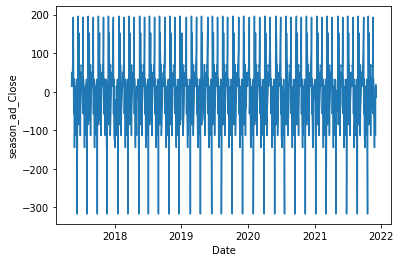

In [26]:
import seaborn as sns

sns.lineplot(df_season.Date, df_season.season_ad_Close)
